# Linear Models I

In [ ]:
# Install required packages if using jupyterhub
# %pip install -r ../requirements.txt

In [16]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import operator

## Quantile-Quantile Plot

In [17]:
import statsmodels.api as sm

In [18]:
# Generate 10000 random numbers from a normal distribution with 0 mean and standard deviation 5
sample = np.random.normal(0, 5, 10000)

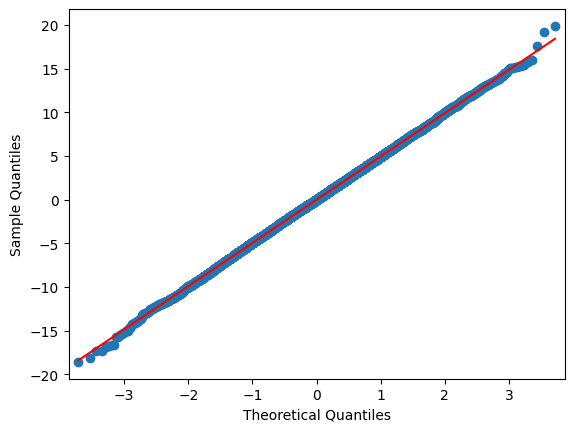

In [19]:
# Compare the samples to a theoretical normal distribution
sm.qqplot(sample,line='s');

## Data Transformations

Sometimes our data does not look strictly linear. In some cases, we can transform our data so that we can easily apply linear regression. To understand various transforms, we will create a data series.

In [20]:
x = np.arange(1,100).reshape(-1,1)
y = np.array([(i**2)+(10*i)*(np.sin(i)+1) for i in x]) # + np.random()

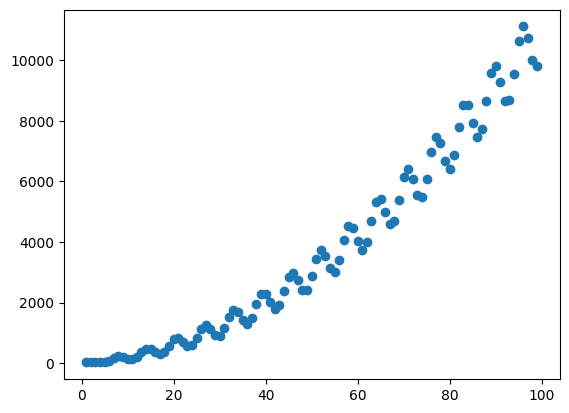

In [21]:
plt.scatter(x,y)

(array([27., 14., 11.,  9., 10.,  5.,  7.,  7.,  5.,  4.]),
 array([   19.41470985,  1129.49766242,  2239.580615  ,  3349.66356758,
         4459.74652016,  5569.82947273,  6679.91242531,  7789.99537789,
         8900.07833046, 10010.16128304, 11120.24423562]),
 <BarContainer object of 10 artists>)

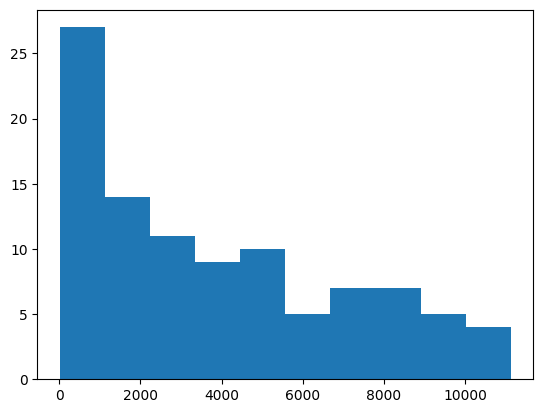

In [22]:
plt.hist(y)

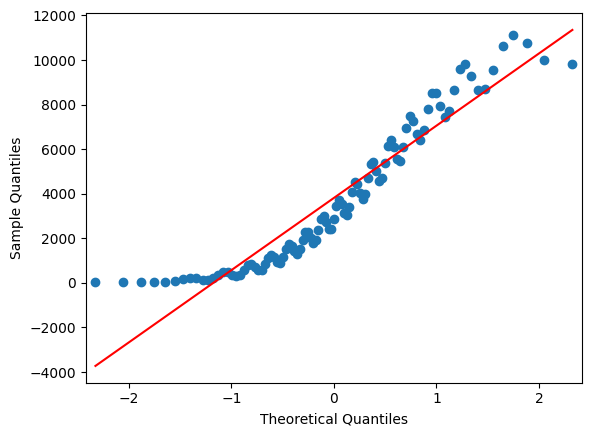

In [23]:
sm.qqplot(y,line='s');

Our data does not look strictly linear, but let's go ahead and fit a linear model

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)
model = LinearRegression() # y=m*x + b

In [25]:
model.fit(x_train, y_train)

LinearRegression()

In [26]:
print("R^2: ",model.score(x_test, y_test))
print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)

R^2:  0.9725412895121123
Slope:  [[109.01964507]]
Intercept:  [-1628.60455011]


Text(0.5, 1.0, 'Residuals')

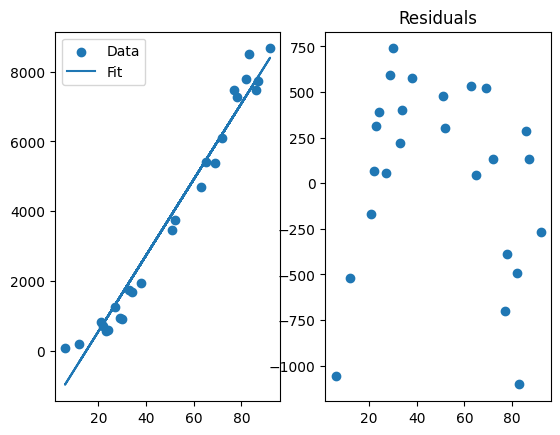

In [27]:
pred_test = model.predict(x_test)
res_test = pred_test - y_test

plt.subplot(121)
plt.scatter(x_test,y_test,label='Data')
plt.plot(x_test,pred_test,label='Fit')
plt.legend()
plt.subplot(122)
plt.scatter(x_test,res_test)
plt.title("Residuals")

That looks pretty good! And the coefficient of determiniation is close to 1. Looks like we have a nice model. Let's plot the model for all of the input data (x).

Text(0.5, 1.0, 'Residuals')

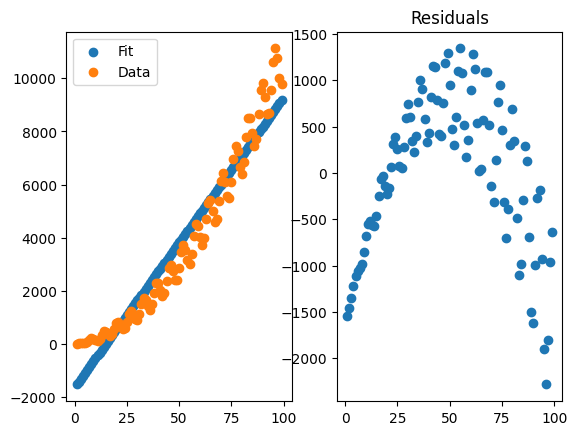

In [28]:
pred = model.predict(x)
res = pred - y

plt.subplot(121)
plt.scatter(x,pred,label='Fit')
plt.scatter(x,y,label='Data')
plt.legend()
plt.subplot(122)
plt.scatter(x,res)
plt.title("Residuals")

Wow! Look at those residuals. I don't think the model we have obtained is great. Looking at the residuals, the error seems to increase as the value of x increases. This could be a sign of heteroscedasticity, which violates one of our assumptions.

Let's try to transform the data (y) and see if this helps make the residuals more normal.

###  Reciprocal Transform

While not very useful for the current example, a reciprocal transforms can be useful for changing the scale of the data if there is a need to make the values more manageable and understandable. It can be particularly useful with data expressed as ratios. 

In [29]:
transform_rec = 1/y

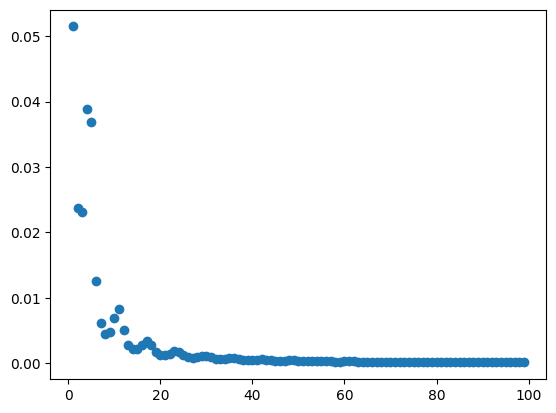

In [30]:
plt.scatter(x,transform_rec)

### Log Transform

In nature, various phenomena have been shown to exhibit an exponential relationship. In the physical sciences, the exponential function shows up often enough that when we think about transformations the log transform should come to mind. The log transform is a special case of a change of base transform. From looking at the residuals, the errors are showing an interesting pattern that we want to try and account for in the model.

In [31]:
transform_log = np.log(y)

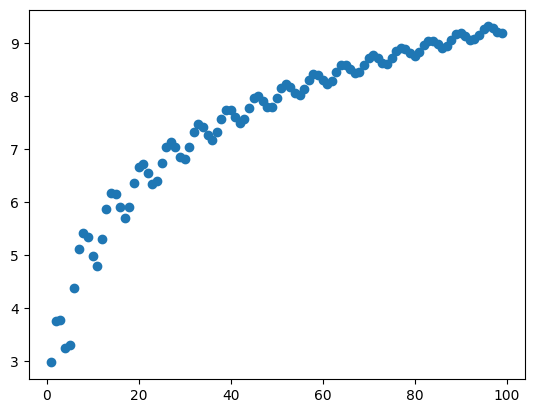

In [32]:
plt.scatter(x,transform_log)

(array([ 3.,  2.,  2.,  5.,  4.,  9., 10., 16., 20., 28.]),
 array([2.96603102, 3.60108017, 4.23612932, 4.87117847, 5.50622762,
        6.14127677, 6.77632593, 7.41137508, 8.04642423, 8.68147338,
        9.31652253]),
 <BarContainer object of 10 artists>)

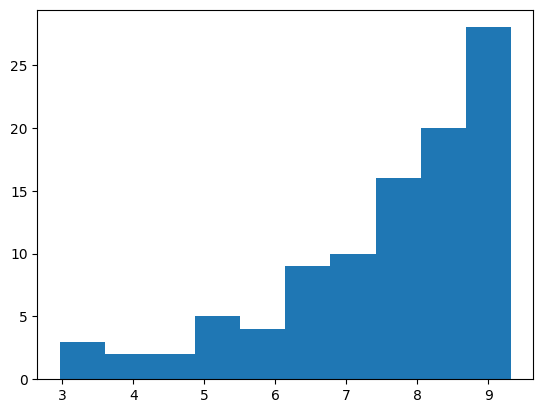

In [33]:
plt.hist(transform_log)

In [34]:
def make_model(x,y):
    """
    1. Takes in the observations (y) and explanatory (x) variable.
    2. Separates into training and test data using test size of 0.25 and random state of 5.
    3. Generates sklearn.linear_model.LinearRegression model
    4. Trains model
    5. Predicts on test data
    6. Predicts on observations (y)
    7. Plots residual and model fit for test data
    8. Plots residual and model fit for observations.
    
    Parameters
    -----------
    x
        Predictors
    y 
        Observations
        
    Returns
    --------
    model
        sklearn.linear_model.LinearRegression
    """
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
    model = LinearRegression()
    model.fit(x_train, y_train)
    print("R^2: ",model.score(x_test, y_test))
    print("Slope: ", model.coef_)
    print("Intercept: ", model.intercept_)
    pred_test = model.predict(x_test)
    res_test = pred_test - y_test

    if(x.shape[1] > 1):
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x_test[:,1],pred_test), key=sort_axis)
        xplt, yplt = zip(*sorted_zip)
    else:
        xplt = x_test
        yplt = pred_test
        
    plt.subplot(121)
    plt.scatter(xplt,y_test,label='Test data')
    plt.plot(xplt,yplt,label='Model fit',color='red',linewidth=2)
    plt.legend()
    plt.subplot(122)
    plt.scatter(xplt,res_test)
    plt.title("Residuals (test data)")
    plt.show()

    pred = model.predict(x)
    res = pred - y

    if(x.shape[1] > 1):
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x[:,1],pred), key=sort_axis)
        xplt, yplt = zip(*sorted_zip)
    else:
        xplt = x
        yplt = pred

    plt.subplot(121)
    plt.plot(xplt,yplt,label='Fit',color='red',linewidth=2)
    plt.scatter(xplt,y,label='Data')
    plt.legend()
    plt.subplot(122)
    plt.scatter(xplt,res)
    plt.title("Residuals")

    return model

In this case it does not look like a log transform is a good idea. It shifted the skew of the data distribution and did not address the underlying issue with the trend still seen in the residuals.

### Square Root Transform

Let's try a square root transform

In [35]:
transform_sqrt = np.sqrt(y) #

R^2:  0.9825851706061838
Slope:  [[1.00454574]]
Intercept:  [4.33539745]


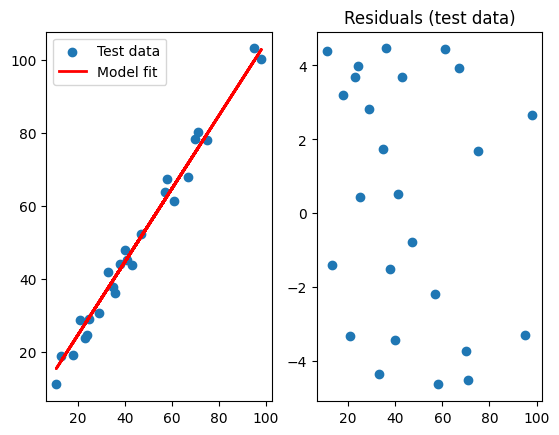

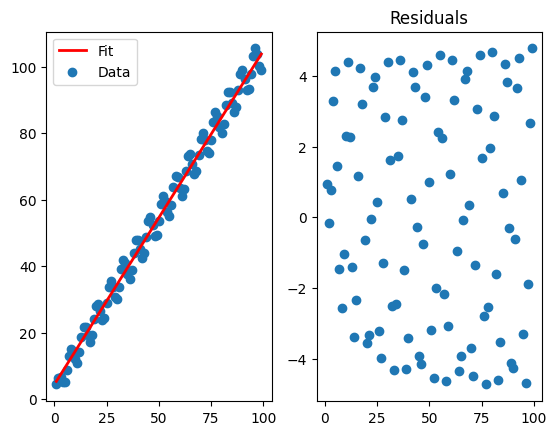

In [36]:
sqrt_model = make_model(x,transform_sqrt)

Excellent! I would say this looks better. The errors look relatively uniform and centered.

An alternative way to do this is via the [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) toolkit in scikit-learn. Just for fun, let's make our own square root transformer (which could be used in a scikit-learn pipeline workflow).

In [37]:
from sklearn import preprocessing
transformer = preprocessing.FunctionTransformer(np.sqrt, validate=True)

In [38]:
transformer.transform(y)[0:5]

array([[4.40621264],
       [6.4950711 ],
       [6.57522625],
       [5.07226776],
       [5.20132543]])

In [39]:
np.sum(transformer.transform(y) - transform_sqrt) # to convince ourselves this is yielding the same data

0.0

### Box-Cox Transform

The Box-Cox is a general power transform. The log and square root transforms are specific cases of a Box-Cox transform.

In [40]:
boxcox_transformer = preprocessing.PowerTransformer(method='box-cox', standardize=True).fit(y)
boxcox_transformer.lambdas_ # this is the exponent

array([0.37675267])

In [41]:
y_boxcox = boxcox_transformer.transform(y)

R^2:  0.9750665274176269
Slope:  [[0.0346834]]
Intercept:  [-1.7407502]


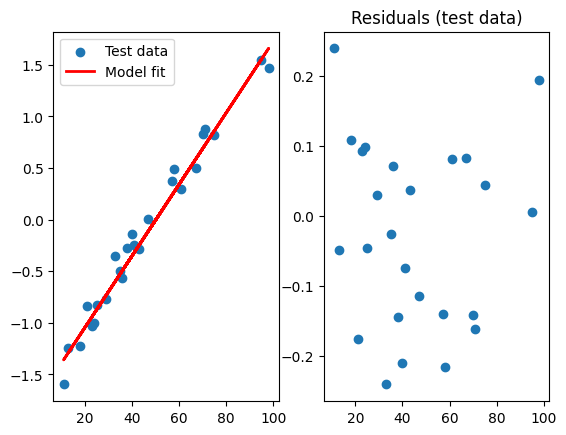

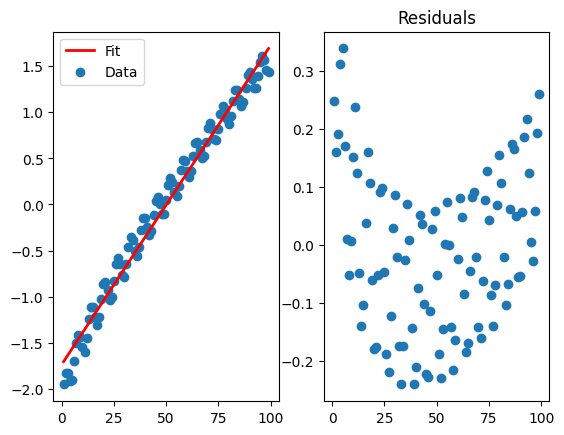

In [42]:
boxcoxmodel = make_model(x,y_boxcox)

The fit here is perhaps not as good as the square root transform, but would help us hone in on the correct transform to use if we did not know where to start. When you have time, explore some of the preprocessing transforms that might be of use such as the [quantile](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html#sklearn.preprocessing.quantile_transform) transformer.

## Polynomial regression

If power transforms are not sufficient, we can look at introducing additional terms into our linear model and using polynomial regression. 

In [43]:
polynomial = preprocessing.PolynomialFeatures(degree=2)
x_poly = polynomial.fit_transform(x)

R^2:  0.9833782730586713
Slope:  [[ 0.         11.08695208  0.98056045]]
Intercept:  [7.18744227]


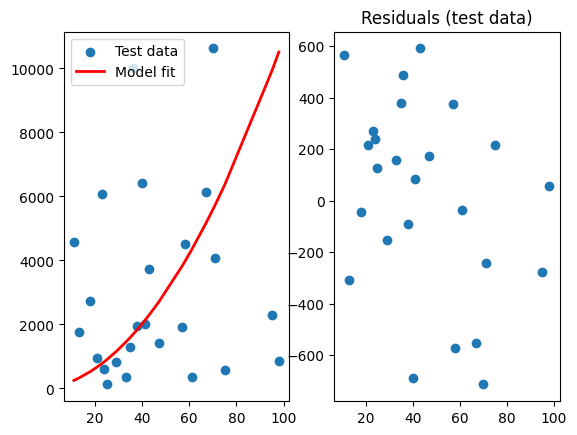

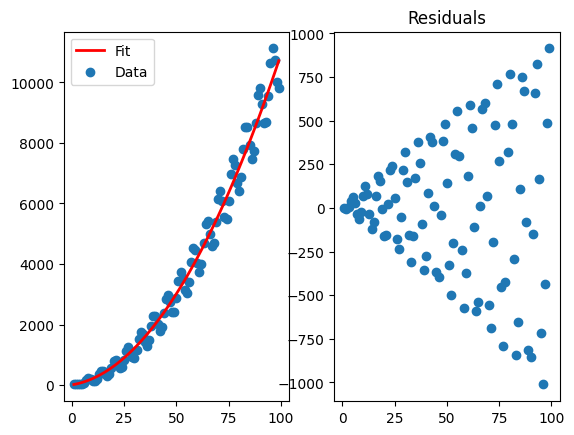

In [44]:
polymodel = make_model(x_poly,y)

While it visually looks like the polynomial has a better fit to the data, the residuals show a different pattern. 

## Takeaway

Overall, based on all the linear models that we have fit to transformed data it seems the one with the square root transform has the best fit and satisfies the assumptions so that we have confidence in using the model. Applying more complex data transformations, via Box-Cox, and using a polynomial to fit the data did not address the underlying issues we sought out to address.

## Resampling

Next we will look at the use of resampling of data. Let's load data on cumulative COVID-19 cases made available by Johns-Hopkins. The data is available on github through the links below.

Cumulative global cases of [COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) available [here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) from Johns-Hopkins.

In [45]:
os.getcwd()

'/Users/yingyap/projects/Core Skills/Oct 2022 /05-simple-predictions/notebooks'

In [46]:
data_folder = os.path.join(os.path.abspath('..'), 'data')

In [47]:
datafile = os.path.join(data_folder,'time_series_covid19_confirmed_global.csv')
covid = pd.read_csv(datafile)

In [48]:
covid.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,127,128,128,128,128,130,130,130,131,131
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1157179,1166924,1173533,1183131,1195276,1205928,1217028,1228814,1236851,1242182
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,87432,89813,92254,93448,94776,97150,99563,101773,104249,106424
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,114,114
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,4421,4425,4432,4435,4443,4445,4454,4459,4462,4469


In [49]:
aus = covid[covid['Country/Region'] == 'Australia'].drop(columns=['Country/Region','Lat','Long'])
aus.head(10)

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20
8,Australian Capital Territory,0,0,0,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,114,114
9,New South Wales,0,0,0,0,3,4,4,4,4,...,4421,4425,4432,4435,4443,4445,4454,4459,4462,4469
10,Northern Territory,0,0,0,0,0,0,0,0,0,...,38,38,38,38,38,39,39,39,39,39
11,Queensland,0,0,0,0,0,0,0,1,3,...,1171,1172,1172,1175,1177,1177,1177,1177,1177,1177
12,South Australia,0,0,0,0,0,0,0,0,0,...,497,501,501,503,504,509,510,512,515,515
13,Tasmania,0,0,0,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,230
14,Victoria,0,0,0,0,1,1,1,1,2,...,20347,20346,20345,20345,20345,20345,20345,20345,20345,20345
15,Western Australia,0,0,0,0,0,0,0,0,0,...,767,769,769,770,771,771,775,776,776,776


In [50]:
aus.set_index(keys='Province/State',inplace=True)
aus.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Australian Capital Territory,0,0,0,0,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,114,114
New South Wales,0,0,0,0,3,4,4,4,4,4,...,4421,4425,4432,4435,4443,4445,4454,4459,4462,4469
Northern Territory,0,0,0,0,0,0,0,0,0,0,...,38,38,38,38,38,39,39,39,39,39
Queensland,0,0,0,0,0,0,0,1,3,2,...,1171,1172,1172,1175,1177,1177,1177,1177,1177,1177
South Australia,0,0,0,0,0,0,0,0,0,0,...,497,501,501,503,504,509,510,512,515,515


In [51]:
aus = aus.transpose()
aus.head()

Province/State,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
1/22/20,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0
1/26/20,0,3,0,0,0,0,1,0


Yikes! Let's try to sample the data at a more meaningful level. The first thing we need to do is ensure that the dataframe columns are appropriately typed.

In [52]:
aus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 1/22/20 to 11/8/20
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Australian Capital Territory  292 non-null    int64
 1   New South Wales               292 non-null    int64
 2   Northern Territory            292 non-null    int64
 3   Queensland                    292 non-null    int64
 4   South Australia               292 non-null    int64
 5   Tasmania                      292 non-null    int64
 6   Victoria                      292 non-null    int64
 7   Western Australia             292 non-null    int64
dtypes: int64(8)
memory usage: 28.6+ KB


In [53]:
aus.index = pd.to_datetime(aus.index) # change the index to a date index
aus.head()

Province/State,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
2020-01-22,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0
2020-01-26,0,3,0,0,0,0,1,0


<AxesSubplot: >

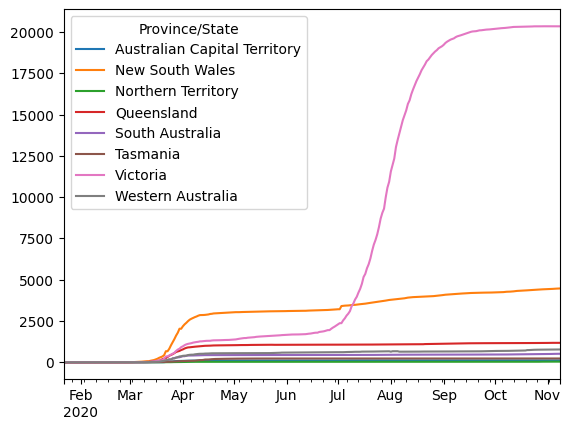

In [54]:
aus.plot() # we can see that the data is showing cumulative counts

In [55]:
daily = aus.diff() #difference the rows to get daily counts

<AxesSubplot: >

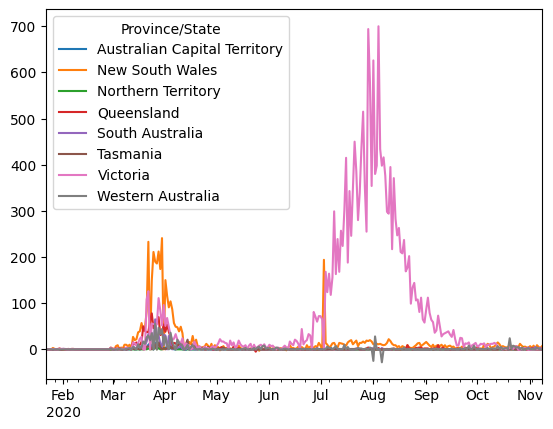

In [56]:
daily.plot()

<AxesSubplot: >

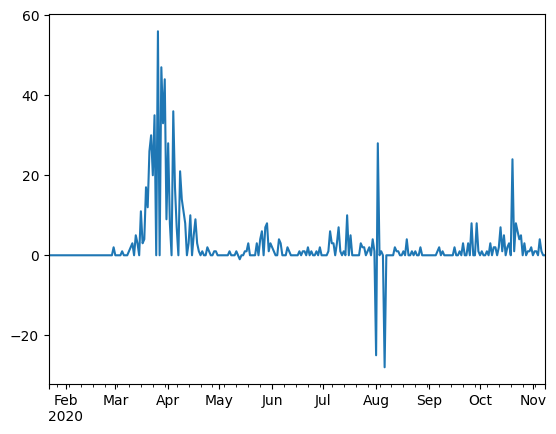

In [57]:
daily['Western Australia'].plot()

<AxesSubplot: >

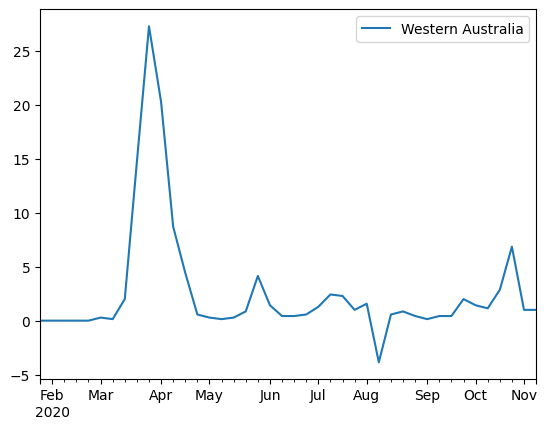

In [58]:
# Let's resample the daily case count for a weekly case count
weekly_summary = pd.DataFrame()
weekly_summary['Western Australia'] = daily['Western Australia'].resample('W',label='right').mean()
weekly_summary.plot()

<AxesSubplot: >

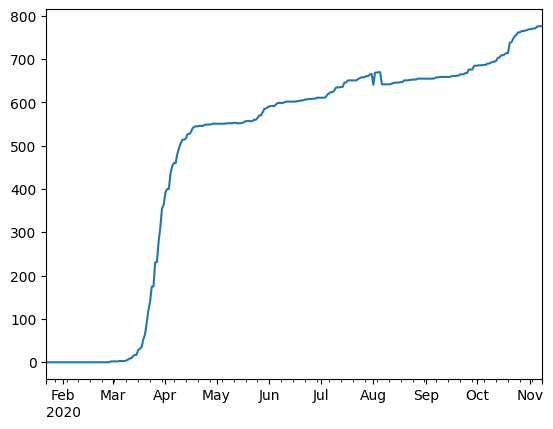

In [59]:
daily['Western Australia'].cumsum().plot() # look at the cumulative counts from daily counts

<AxesSubplot: >

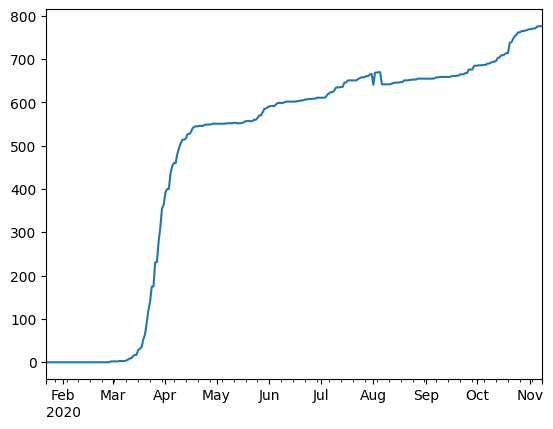

In [60]:
aus['Western Australia'].plot() # look at the original data

<AxesSubplot: >

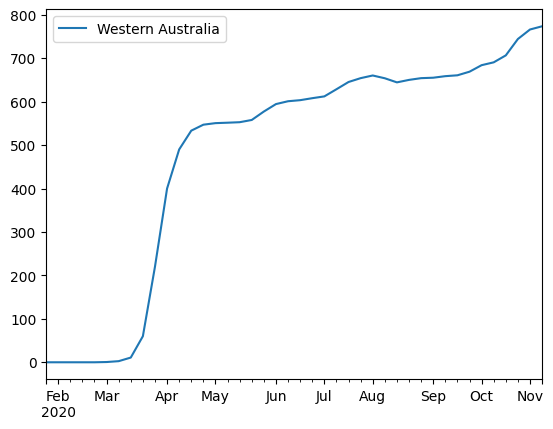

In [61]:
weekly = pd.DataFrame()
weekly['Western Australia'] = aus['Western Australia'].resample('W',label='right').mean() # resample the original data to a weekly mean
weekly.plot()

In [62]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2020-01-26 to 2020-11-08
Freq: W-SUN
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Western Australia  42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


By resampling the data, we can reduce the number of data and get a weekly average rather than a daily count.

### Resampling and fitting a model

Back to our toy example. Let's treat it like a set of timeseries data.

In [73]:
df = pd.DataFrame()
df['date'] = pd.date_range(start='1/1/2019', end='12/31/2019', periods=len(y))
df['y'] = y
df.set_index('date', inplace=True, drop=False)

In [74]:
df.head()

,date,y
date,,
2019-01-01 00:00:00.000000000,2019-01-01 00:00:00.000000000,19.414710
2019-01-04 17:08:34.285714285,2019-01-04 17:08:34.285714285,42.185949
2019-01-08 10:17:08.571428571,2019-01-08 10:17:08.571428571,43.233600
2019-01-12 03:25:42.857142857,2019-01-12 03:25:42.857142857,25.727900
2019-01-15 20:34:17.142857142,2019-01-15 20:34:17.142857142,27.053786


<AxesSubplot: xlabel='date'>

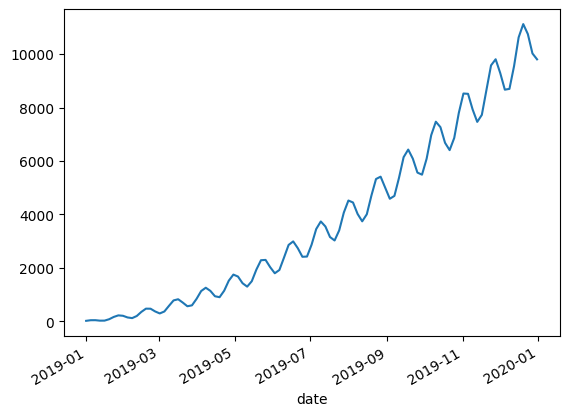

In [75]:
df.y.plot()

<AxesSubplot: xlabel='date'>

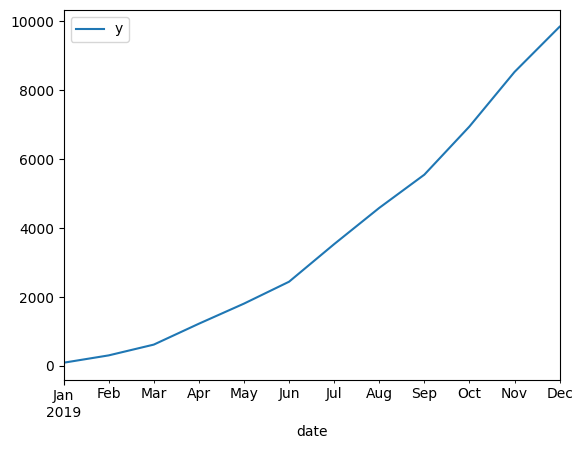

In [76]:
monthly_summary = pd.DataFrame()
monthly_summary['y'] = df.y.resample('M',label='right').mean()
monthly_summary.plot()

In [77]:
monthly_summary.reset_index(inplace=True)

In [78]:
monthly_summary['date_delta'] = (monthly_summary['date'] - monthly_summary['date'].min()) / np.timedelta64(1,'D')
monthly_summary

,date,y,date_delta
0,2019-01-31,92.564378,0.0
1,2019-02-28,305.285087,28.0
2,2019-03-31,617.793711,59.0
3,2019-04-30,1223.581598,89.0
4,2019-05-31,1806.048114,120.0
5,2019-06-30,2441.111777,150.0
6,2019-07-31,3530.924020,181.0
7,2019-08-31,4581.416352,212.0
8,2019-09-30,5544.710326,242.0
9,2019-10-31,6941.327211,273.0


R^2:  0.791613874505599
Slope:  [29.40512528]
Intercept:  -929.3500820859299


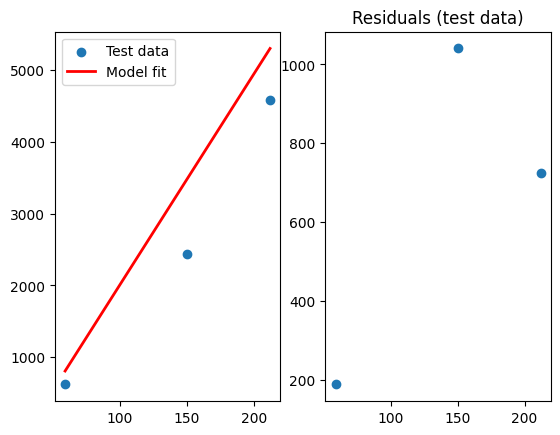

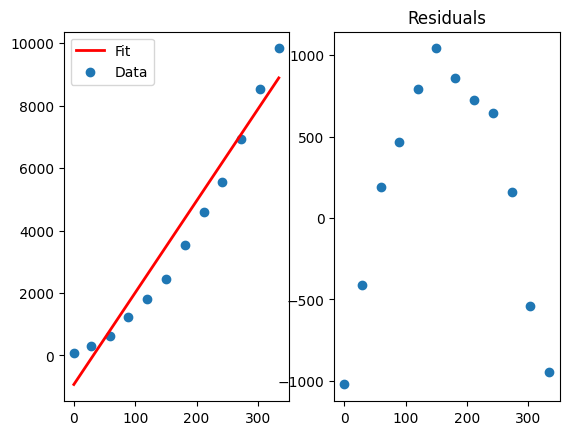

In [80]:
newx = np.array(monthly_summary['date_delta']).reshape(-1, 1)
month_model = make_model(newx,monthly_summary['y'])

R^2:  0.9968660572642487
Slope:  [0.26832941]
Intercept:  10.220163820776833


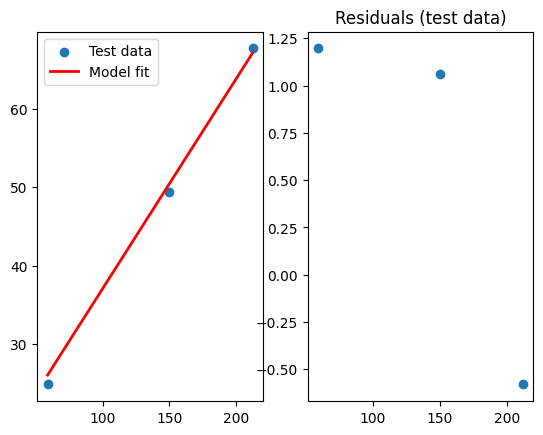

LinearRegression()

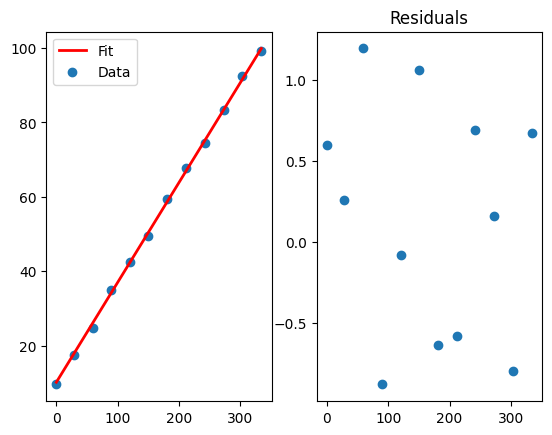

In [82]:
make_model(newx, np.sqrt(monthly_summary['y']))

## Exercise: Fit a model to the cumulative case counts for Western Australia

Using the COVID-19 data sourced from John Hopkins, try to fit a linear model to the cumulative case counts. Some tasks to consider before fitting a linear model:

- What is the time increment to be used?
- Will a data transformation be necessary?
- Will zero values pose a problem?

As you test fitting different models and data transformations, think about what each of one is doing to the data. Does it make sense?

In [83]:
weekly['date_delta'] = (weekly.index - weekly.index.min()) / np.timedelta64(1,'D')

In [84]:
weekly_y = weekly['Western Australia'].values.reshape(-1, 1)
weekly_x = np.array(weekly['date_delta']).reshape(-1, 1)

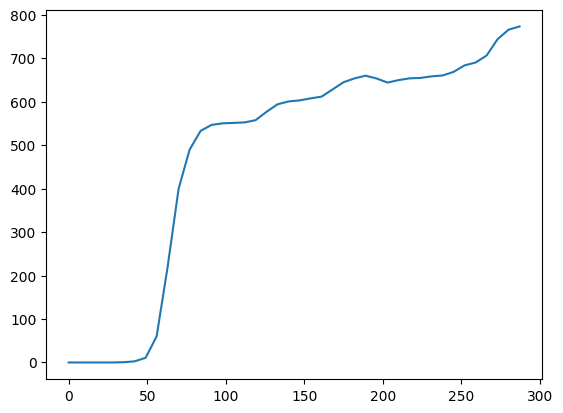

In [85]:
plt.plot(weekly_x,weekly_y)

Try using a power transform called yeo-johnson, similar to the box-cox, that works with zero valued data.

In [86]:
weekly_transformer = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True).fit(weekly_y)
weekly_transformer.lambdas_ # this is the exponent

array([0.7070943])

R^2:  0.6412263691555421
Slope:  [[0.00790139]]
Intercept:  [-1.01989462]


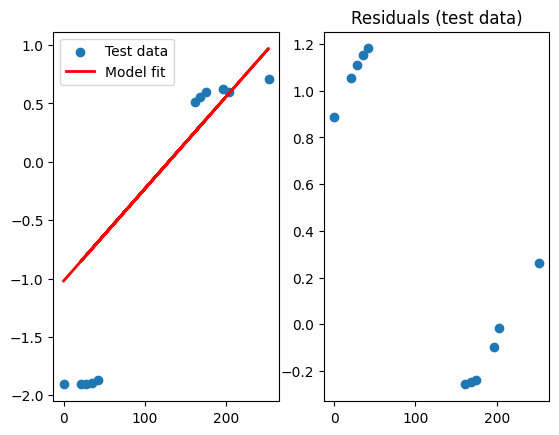

LinearRegression()

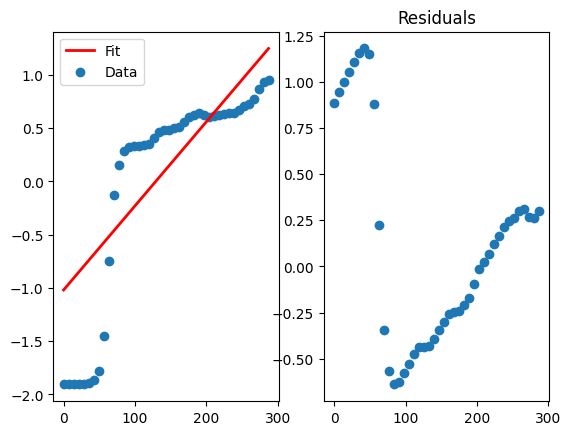

In [87]:
y_transform = weekly_transformer.transform(weekly_y)
make_model(weekly_x,y_transform)

Try a polynomial of differing orders

R^2:  0.9145729412371022
Slope:  [[ 0.00000000e+00  1.08794182e+01 -4.84111017e-02  7.61571642e-05]]
Intercept:  [-187.07217139]


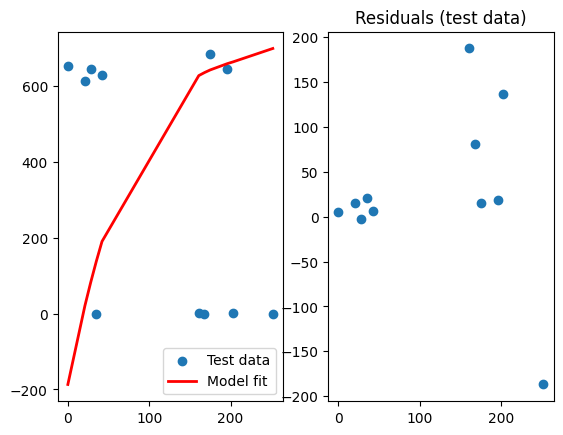

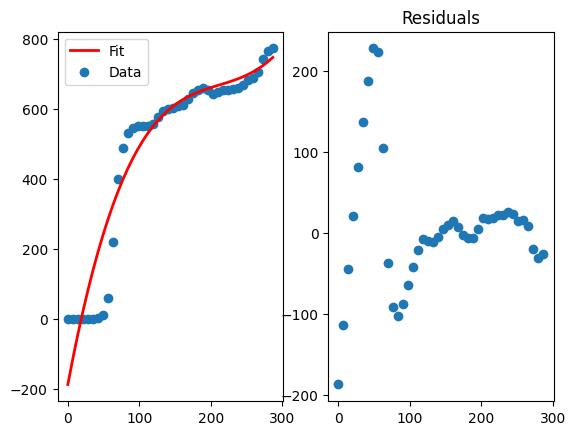

In [88]:
polynomial = preprocessing.PolynomialFeatures(degree=3)
x_poly = polynomial.fit_transform(weekly_x)
polymodel = make_model(x_poly,weekly_y)

Having tested a few different models, consider :
- How well does a linear model fit the cumulative counts?
- Does it make sense to fit a model to the cumulative counts? What about the daily counts?
- What other strategies could be used?